Laboratório 3 –Captura de Imagem e Vídeo

Edson Felipe - 11201922149
Caio Falcheti - 11201920936
Nicolas Vidal - 

Introdução: Neste relatório, são apresentadas técnicas básicas de uso das bibliotecas "cv2" em python, que permitem a abertura, captura e escrita de imagens e vídeos.

PARTE 1: Processamento Básico nas Imagens e Vídeos.

(A) Leitura de imagem em arquivo: O programa “L__1_img.py” realiza a leitura e de imagem gravado
num arquivo e mostra a imagem numa janela do linux. Além disso, o programa permite salvar a
imagem em arquivo. Execute e verifique o resultado:

Por que a janela aberta não mostra a imagem colorida?

RESPOSTA: Porque quando se lê a imagem ela só armazena o espectro preto e branco como mostrado em :
k = cv.waitKey(0) & 0xFF.
este 0xFF é o tom preto e branco da imagem sendo salvo

(B) Leitura de vídeo em arquivo: O programa “L__2_video.py” realiza a leitura de video gravado num
arquivo e exibe a sequencia das imagems numa janela do linux. Execute e verifique o resultado:

Qual a explicação de alteração de velocidade de exibição, e apresente suas soluções detalhadamente.

RESPOSTA: A parte que define o fps de exibição é a seguinte:

fps = cap.get(cv.CAP_PROP_FPS)
if fps is None or fps <= 0:
    fps = 25.0  # fallback

Onde o valor de fps varia diretamente a velocidade do video, acelerando conforme o seu valor.

(C) O programa “L__3_webcam.py” realiza a leitura de imagens da
camera instalada no computador e exibe a sequencia das imagems amostradas numa janela do linux.
Execute e verifique o resultado:

Modifique o programa para que uma imagem da câmera seja salva num arquivo
“foto1.png” no momento em que for clicada a tecla ‘x’ no teclado. Apresente o resultado e sua
solução detalhadamente.

In [ ]:
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    raise SystemExit(1)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    cv.imshow("frame", frame)

    key = cv.waitKey(1) & 0xFF
    if key == ord("q"):
        break
    if key == ord("x"):
        cv.imwrite("foto1.png", frame)
        print("Salvou foto1.png")

cap.release()
cv.destroyAllWindows()

com o comando cv.imwrite é possivel salvar a foto conforme o solicitado.
A foto capturada pode ser vista abaixo

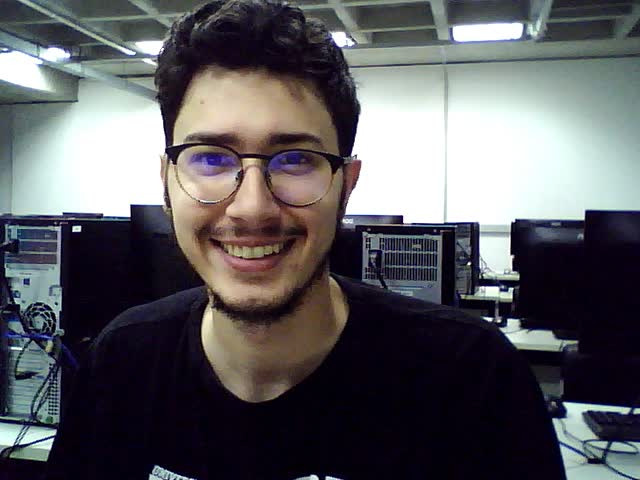

In [2]:
from IPython.display import Image, display

img_path = 'foto1.png'

display(Image(filename=img_path)) 

(D) Gravação de vídeo da câmera: O programa “L__4_webcap.py” realiza a leitura de imagens da
câmera, exibr a sequência de imagens numa nova janela do Linux, e ao digitar a tecla “q” salva toda
a sequência de imagens num arquivo “saida.avi” no formato AVI de vídeo. Execute e verifique o
resultado:

Modifique o programa para que as imagens gravadas estejam “normais” no arquivo de
video salvo, e apresentem uma velocidade de exibição adequada. Apresente o resultado e sua
solução detalhadamente.

In [ ]:
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    raise SystemExit(1)

width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

fps = 20.0  # escolha “adequada” (pode ajustar)
delay_ms = int(1000 / fps)

fourcc = cv.VideoWriter_fourcc(*"XVID")
out = cv.VideoWriter("saida.avi", fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    # REMOVIDO: frame = cv.flip(frame, 0)  # isso deixava o vídeo invertido

    out.write(frame)
    cv.imshow("frame", frame)

    key = cv.waitKey(delay_ms) & 0xFF
    if key == ord("q"):
        break

cap.release()
out.release()
cv.destroyAllWindows()

In [10]:
#Video obtido
from IPython.display import Video

Video("caio_lento.mp4")

Se for necessário alterar a imagem, ou seja realizando alguma operação de procesamento nela, em que
ponto dos quatro programas estudados isso deve ser realizado?

Logo após a captura da imagem, estes programas são bem simples, basicamente existe a captura da imagem da camera se nenhum processamento, o que possibilita bastante manejo do material usado.

PARTE 2: Obtenção de Fotos e Vídeos.

a) Obter com a webcam uma foto geral com TODOS os integrantes da EQUIPE, sendo que cada um
deve usar uma roupa de cor diferente, melhor se for com as cores Vermelho, Verde e Azul
destacadas. Cuidem para a iluminação ficar boa. Podem usar qualquer editor de imagem caso
necessitem “Compor” as fotos individuais para formar a foto geral.

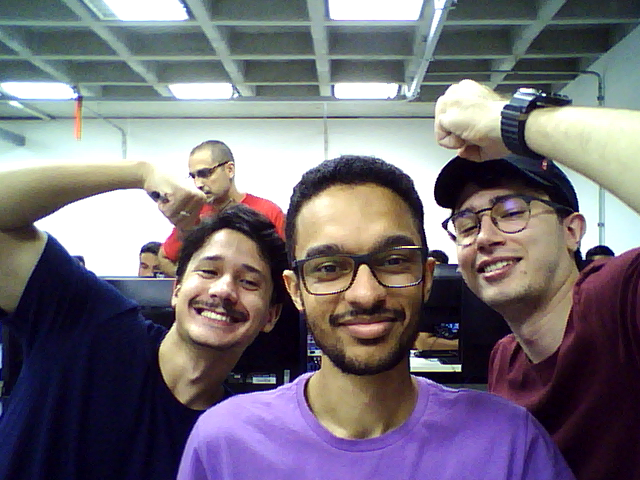

In [2]:
from IPython.display import Image, display

img_path = 'GABIGOL.png'

display(Image(filename=img_path)) 


b) Façam uma foto-montagem “Avatar”, juntando todos avatares numa única imagem. Meu
“Avatar” por exemplo, é o Pikachu... A ordem dos avatares deve ser a mesma da foto geral.
Podem usar qualquer editor de imagem para “Compor” as fotos individuais que cada um da
equipe vai fornecer.

A foto, que pode ser visualizada abaixo, foi criada utilizando o software "Canva" disponível em: https://www.canva.com/

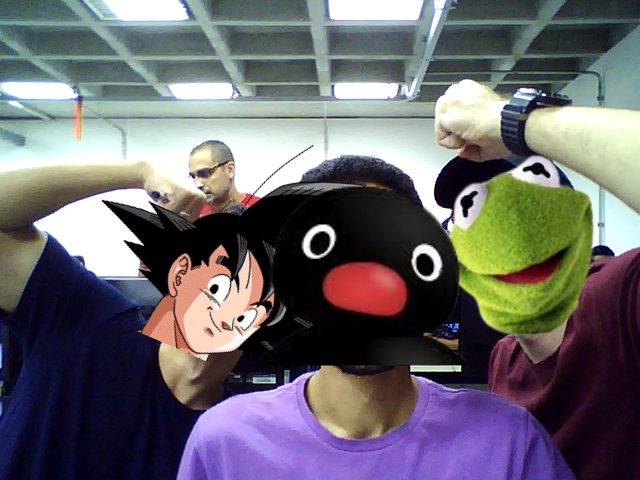

In [3]:
from IPython.display import Image, display

img_path = 'PDI_2026_avatares.png'

display(Image(filename=img_path)) 

c) Filmem com a webcam DOIS vídeos com pessoas e DOIS videos com um objeto:

i) um com mudanças lentas de movimento;

In [4]:
#Video com pessoa lento
from IPython.display import Video

Video("caio_lento.mp4")

In [6]:
#Video com objeto lento
from IPython.display import Video

Video("oculos_lento.mp4")

ii) e outro com mudanças rápidas de movimento.

In [8]:
#Video com pessoa rapido
from IPython.display import Video

Video("edson_rapido.mp4")

In [9]:
#Video com objeto rapido
from IPython.display import Video

Video("mouse_rapido.mp4")

iii) Em cada um dos vídeos os membros da equipe DEVEM ser diferentes. Podem ser apenas
dois membros, um em cada vídeo, e sugiro escolherem os que possuem as melhores
câmeras